<a href="https://colab.research.google.com/github/ecordeiro/data_science/blob/main/Analisando_os_Dados_do_Airbnb_Bruxelas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Bruxelas*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Bruxelas, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [2]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

%matplotlib inline

In [3]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/belgium/bru/brussels/2021-07-13/visualisations/listings.csv')

## Funções

In [4]:
def dummie(latributs,data_frame):
    """
      Função para transformar uma coluna com dados categóricos em várias colunas com dados binários.
      Parametros:
        latributs -> Lista com nomes das colunas com dados categóricos
        data_frame -> Dataframe com os dados originais
      Retorno:
        Dataframe ja com as novas colunas e valores transformados
    """
    l_df_retorno = []
    for column in latributs:
        df = pd.get_dummies(data_frame[column],
                             prefix=column,
                             prefix_sep='_',
                             dummy_na=False, 
                             columns=None, 
                             sparse=False, 
                             drop_first=False, 
                             dtype=None)
        l_df_retorno.append(df)
    return pd.concat(l_df_retorno,axis=1)

## Análise dos Dados


**Dicionário das variáveis**

* **id**: Identificador do Imóvel a ser alugado
* **name**: Descrição do Imóvel a ser alugado
* **host_id**: Identificador do Host. Um host poderá ter mais de um imóvel para ser alugado.
* **host_name**: Nome do host.
* **neighbourhood_group**: O grupo de vizinhança foi geocodificado usando a latitude e longitude em comparação com as vizinhanças definidas por shapefiles digitais abertos ou públicos. Todos os valores estão nulos.
* **neighbourhood**: Nome dos bairros dos imóveis. 
A vizinhança foi geocodificada usando a latitude e longitude em comparação com as vizinhanças definidas por shapefiles digitais abertos ou públicos.
* **latitude**: Valor da latitude do imóvel. *Uses the World Geodetic System (WGS84) projection for latitude and longitude.*
* **longitude**: Valor da longitude do imóvel. *Uses the World Geodetic System (WGS84) projection for latitude and longitude.*
* **room_type**: Tipo de Imóvel ('Entire home/apt', 'Hotel room', 'Private room', 'Shared room')

 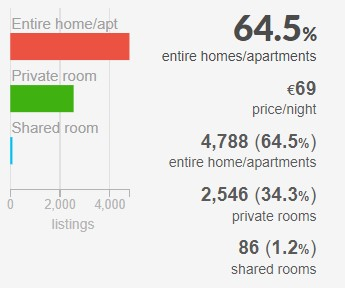

* **price**: Preço da diária do Imóvel
* **minimum_nights**: Mínimo de noites para aluguel
* **number_of_reviews**: número de comentários de clientes que alugaram anteriormente
* **last_review**: data do último comentário
* **reviews_per_month**: % do número de comentários em relação ao número de locações realizadas por mês.
* **calculated_host_listings_count**: Número de imoveis do Host
* **availability_365**: Quantidade de diárias disponíveis durante o ano.

 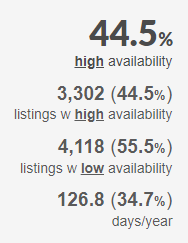



Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [5]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2352,"Triplex-2chmbrs,grande sdb,terrasse= tous confort",2582,Oda,NaN,Molenbeek-Saint-Jean,50.85702,4.30771,Entire home/apt,90,2,16,2017-06-30,0.19,2,264
1,2354,COURT/Long- 1chmb+1salon+sdd+terras,2582,Oda,NaN,Molenbeek-Saint-Jean,50.85709,4.30757,Entire home/apt,74,2,2,2018-10-28,0.03,2,363
2,45145,B&B Welcome to my place - 2,199370,Erick,NaN,Bruxelles,50.85182,4.36809,Hotel room,91,1,3,2010-11-06,0.11,2,338
3,48180,Top Apart/location 0 default 2rooms,219560,Ahmet,NaN,Woluwe-Saint-Pierre,50.83771,4.40707,Entire home/apt,200,2,0,NaN,NaN,1,365
4,52796,Bright apartment in Ixelles/Louise,244722,Pierre,NaN,Ixelles,50.83362,4.36057,Entire home/apt,74,5,105,2020-02-28,1.00,1,285


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [6]:
# identificar o volume de dados do DataFrame
print(df.shape)

# verificar as 5 primeiras entradas do dataset
df.head()

(5718, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2352,"Triplex-2chmbrs,grande sdb,terrasse= tous confort",2582,Oda,NaN,Molenbeek-Saint-Jean,50.85702,4.30771,Entire home/apt,90,2,16,2017-06-30,0.19,2,264
1,2354,COURT/Long- 1chmb+1salon+sdd+terras,2582,Oda,NaN,Molenbeek-Saint-Jean,50.85709,4.30757,Entire home/apt,74,2,2,2018-10-28,0.03,2,363
2,45145,B&B Welcome to my place - 2,199370,Erick,NaN,Bruxelles,50.85182,4.36809,Hotel room,91,1,3,2010-11-06,0.11,2,338
3,48180,Top Apart/location 0 default 2rooms,219560,Ahmet,NaN,Woluwe-Saint-Pierre,50.83771,4.40707,Entire home/apt,200,2,0,NaN,NaN,1,365
4,52796,Bright apartment in Ixelles/Louise,244722,Pierre,NaN,Ixelles,50.83362,4.36057,Entire home/apt,74,5,105,2020-02-28,1.00,1,285


* É possível identificar 5718 linhas e 16 colunas no data frame de Bruxelas

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [7]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.197622
last_review                       0.197622
host_name                         0.000350
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
name                              0.000000
id                                0.000000
dtype: float64

In [8]:
df[['reviews_per_month']].describe()

,reviews_per_month
count,4588.000000
mean,1.244477
std,1.553920
min,0.010000
25%,0.230000
50%,0.660000
75%,1.610000
max,12.240000


In [9]:
df['last_review'].describe()

count           4588
unique          1278
top       2021-06-27
freq              48
Name: last_review, dtype: object

In [10]:
df['last_review'].sort_values()

2       2010-11-06
22      2011-10-24
11      2012-01-23
53      2012-07-03
44      2012-07-20
           ...    
5713           NaN
5714           NaN
5715           NaN
5716           NaN
5717           NaN
Name: last_review, Length: 5718, dtype: object

In [11]:
df[df.reviews_per_month.isnull()][['reviews_per_month','number_of_reviews','last_review']].drop_duplicates()

,reviews_per_month,number_of_reviews,last_review
3,NaN,0,NaN


* Percebemos que a varíavel neighbourhood_group está completamente nula. Vamos realizar a exclusão.
* As Variáveis reviews_per_month e last_review, estão nulas por não existirem reviews realizadas. Dessa forma, irei preencher a reviews_per_month com 0 onde for nula e a last_review com '01/01/1900' onde for nulo.

In [12]:
df.reviews_per_month.fillna(0, inplace=True)
df.last_review.fillna('1900-01-01', inplace=True)

* **Analisando host_name**

In [13]:
host_id_lst = list(df[df.host_name.isnull()]['host_id'])

In [14]:
df[df.host_id.isin(host_id_lst)]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
789,8979970,"Duplex loft Midi station, close to the city ce...",12105893,NaN,NaN,Anderlecht,50.83379,4.33105,Entire home/apt,100,4,24,2017-04-09,0.36,1,29
2412,28998246,Luxury Brussels Design Loft with a view .,6435844,NaN,NaN,Jette,50.86632,4.33253,Entire home/apt,99,2,1,2018-10-19,0.03,1,358


* Percebemos que somente duas linhas estão nulas. Fizemos uma busca na base pelo host_id, para tentar identificar o host_name, mas sem sucesso.
* Mediante a esse resultado, optei por preencher o valor nulo com o mesmo valor do host_id.

In [15]:
df.loc[df.host_name.isnull(),'host_name'] = df.loc[df.host_name.isnull()]['host_id']

In [16]:
df.host_name.isnull().sum()

0

In [17]:
df.drop(['neighbourhood_group'],axis=1, inplace=True)

* **Verificando novamente os dados nulos**

In [18]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

availability_365                  0.0
calculated_host_listings_count    0.0
reviews_per_month                 0.0
last_review                       0.0
number_of_reviews                 0.0
minimum_nights                    0.0
price                             0.0
room_type                         0.0
longitude                         0.0
latitude                          0.0
neighbourhood                     0.0
host_name                         0.0
host_id                           0.0
name                              0.0
id                                0.0
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

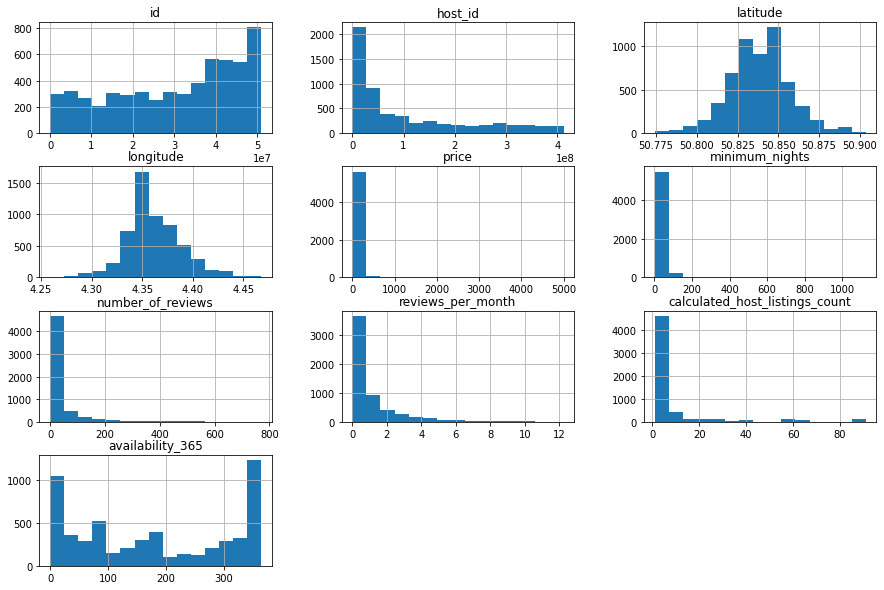

In [19]:
df.hist(bins=15, figsize=(15,10));

Analisando as distribuições aciama, percebemos duas distribuições próximas a **distribuição normal** nas colunas **latitude e longitude**.

Ja nas colunas **price, minimum_nights, number_of_reviews, reviews_per_month e calculated_host_listings_count**, é possível perceber uma grande possibilidade da presença de **outliers**.

As colunas **id e host_id**, por se tratarem de identificadores não necessitam de análise, assim como a coluna **neighbourhood_group**, onde não existem dados válidos.

Na coluna **availability_365**, será necessário uma avaliação mais aprofundada, ja que não foi possível identificar uma distribuição nem outros tipos de padrão.



### **Análise de Outliers**

*Outliers* são pontos discrepantes, que estão destoando do padrão do conjunto de dados.

É muito importante conseguir identificar e tratar esses outliers, pois eles podem nos mostrar uma imagem incorreta dos nossos dados.


<p align="center"><img src="https://miro.medium.com/max/18000/1*2c21SkzJMf3frPXPAR_gZA.png
", width="50%"></p>

In [20]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,5.718000e+03,5.718000e+03,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000
mean,3.033152e+07,1.056474e+08,50.838571,4.361439,83.652151,10.054215,33.890171,0.998541,7.185729,180.273872
std,1.542586e+07,1.180736e+08,0.018555,0.027471,144.053468,37.243069,67.936768,1.477502,15.618846,135.466496
min,2.352000e+03,2.582000e+03,50.774130,4.258890,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.746350e+07,1.709387e+07,50.826930,4.345105,43.000000,1.000000,1.000000,0.060000,1.000000,49.000000
50%,3.384563e+07,4.609152e+07,50.838401,4.356425,60.000000,2.000000,7.000000,0.420000,1.000000,169.000000
75%,4.384281e+07,1.722988e+08,50.849720,4.377543,89.000000,4.000000,33.000000,1.260000,4.000000,327.000000
max,5.099906e+07,4.123949e+08,50.903680,4.467680,5000.000000,1125.000000,771.000000,12.240000,91.000000,365.000000


Confirmando a análise anterior, percebe uma diferença significativa nas variáveis **price, minimum_nights, number_of_reviews e calculated_host_listings_count.**

Importante realizarmos a exclusão dos outliers nestes casos para evitar problemas de viés na criação do modelo.

### Aplicando tratamento de **outlier** na variável **price**







In [21]:
# identificando os outliers para a variável price
q1_price = df.price.quantile(.25)
q3_price = df.price.quantile(.75)
IQR_price = q3_price - q1_price
print('IQR da variável price: ', IQR_price)

# definindo os limites                                       
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print('Limite superior de price: ', sup_price)
print('Limite inferior de price: ', inf_price)

IQR da variável price:  46.0
Limite superior de price:  158.0
Limite inferior de price:  -26.0


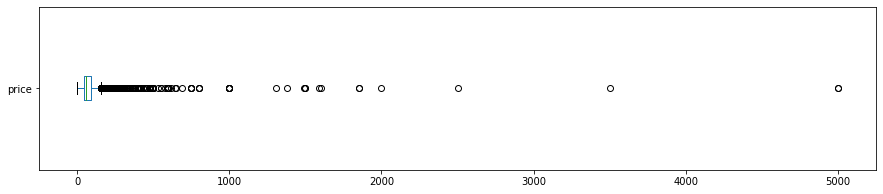

price: valores acima de 158.0000:
426 entradas
7.4502%


In [22]:
df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("price: valores acima de {:,.4f}:".format(sup_price))
print("{} entradas".format(len(df[df.price > sup_price])))
print("{:.4f}%".format((len(df[df.price > sup_price]) / df.shape[0])*100))

### Aplicando tratamento de **outlier** na variável **minimum_nights**

In [23]:
# identificando os outliers para a variável price
q1_minimum_nights = df.minimum_nights.quantile(.25)
q3_minimum_nights = df.minimum_nights.quantile(.75)
IQR_minimum_nights = q3_minimum_nights - q1_minimum_nights
print('IQR da variável minimum_nights: ', IQR_minimum_nights)

# definindo os limites                                       
sup_minimum_nights = q3_minimum_nights + 1.5 * IQR_minimum_nights
inf_minimum_nights = q1_minimum_nights - 1.5 * IQR_minimum_nights

print('Limite superior de price: ', sup_minimum_nights)
print('Limite inferior de price: ', inf_minimum_nights)

IQR da variável minimum_nights:  3.0
Limite superior de price:  8.5
Limite inferior de price:  -3.5


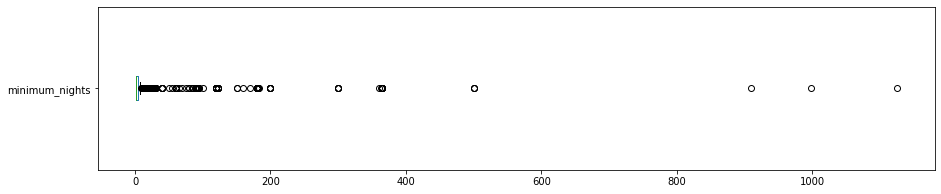

minimum_nights: valores acima de 8.5000:
775 entradas
13.5537%


In [24]:
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de {:,.4f}:".format(sup_minimum_nights))
print("{} entradas".format(len(df[df.minimum_nights > sup_minimum_nights])))
print("{:.4f}%".format((len(df[df.minimum_nights > sup_minimum_nights]) / df.shape[0])*100))

### Aplicando tratamento de **outlier** na variável **number_of_reviews**

In [25]:
# identificando os outliers para a variável number_of_reviews
q1_number_of_reviews = df.number_of_reviews.quantile(.25)
q3_number_of_reviews = df.number_of_reviews.quantile(.75)
IQR_number_of_reviews = q3_number_of_reviews - q1_number_of_reviews
print('IQR da variável number_of_reviews: ', IQR_number_of_reviews)

# definindo os limites                                       
sup_number_of_reviews = q3_number_of_reviews + 1.5 * IQR_number_of_reviews
inf_number_of_reviews = q1_number_of_reviews - 1.5 * IQR_number_of_reviews

print('Limite superior de price: ', sup_number_of_reviews)
print('Limite inferior de price: ', inf_number_of_reviews)

IQR da variável number_of_reviews:  32.0
Limite superior de price:  81.0
Limite inferior de price:  -47.0


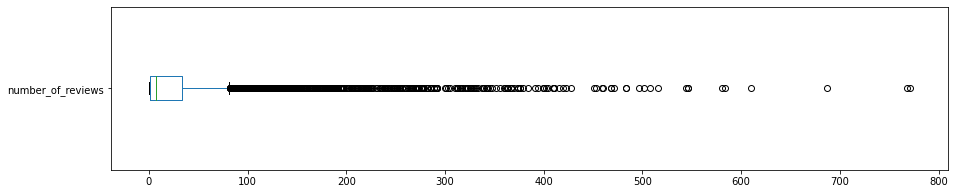

number_of_reviews: valores acima de 81.0000:
698 entradas
12.2071%


In [26]:
df.number_of_reviews.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("number_of_reviews: valores acima de {:,.4f}:".format(sup_number_of_reviews))
print("{} entradas".format(len(df[df.number_of_reviews > sup_number_of_reviews])))
print("{:.4f}%".format((len(df[df.number_of_reviews > sup_number_of_reviews]) / df.shape[0])*100))

### Aplicando tratamento de **outlier** na variável **calculated_host_listings_count**

In [27]:
# identificando os outliers para a variável calculated_host_listings_count
q1_calculated_host_listings_count = df.calculated_host_listings_count.quantile(.25)
q3_calculated_host_listings_count = df.calculated_host_listings_count.quantile(.75)
IQR_calculated_host_listings_count = q3_calculated_host_listings_count - q1_calculated_host_listings_count
print('IQR da variável calculated_host_listings_count: ', IQR_calculated_host_listings_count)

# definindo os limites                                       
sup_calculated_host_listings_count = q3_calculated_host_listings_count + 1.5 * IQR_calculated_host_listings_count
inf_calculated_host_listings_count = q1_calculated_host_listings_count - 1.5 * IQR_calculated_host_listings_count

print('Limite superior de price: ', sup_calculated_host_listings_count)
print('Limite inferior de price: ', inf_calculated_host_listings_count)

IQR da variável calculated_host_listings_count:  3.0
Limite superior de price:  8.5
Limite inferior de price:  -3.5


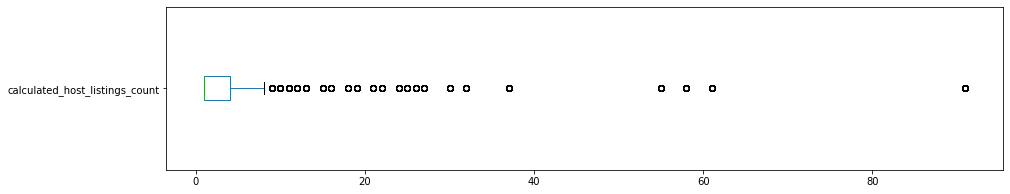

calculated_host_listings_count: valores acima de 8.5000:
982 entradas
17.1738%


In [28]:
df.calculated_host_listings_count.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("calculated_host_listings_count: valores acima de {:,.4f}:".format(sup_calculated_host_listings_count))
print("{} entradas".format(len(df[df.calculated_host_listings_count > sup_calculated_host_listings_count])))
print("{:.4f}%".format((len(df[df.calculated_host_listings_count > sup_calculated_host_listings_count]) / df.shape[0])*100))

In [29]:
# limpando o dataset
df_clean = df.copy()

df_clean.drop(df_clean[df_clean.price > sup_price].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price == 0.0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > sup_minimum_nights].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.number_of_reviews > sup_number_of_reviews].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.calculated_host_listings_count > sup_calculated_host_listings_count].index, axis=0, inplace=True)


print('Shape antes da limpeza: ', df.shape)
print('Shape após a limpeza: ',df_clean.shape)
print('Percentual de dados excluidos em relação ao total: {}'.format((1- df_clean.shape[0]/df.shape[0]) * 100))

Shape antes da limpeza:  (5718, 15)
Shape após a limpeza:  (3348, 15)
Percentual de dados excluidos em relação ao total: 41.44805876180483


>Após a retirada dos outliers, percebemos que realizamos a exclusão de 41% do nosso dataframe, ou seja, o dataframe atual está com **3348** registros.




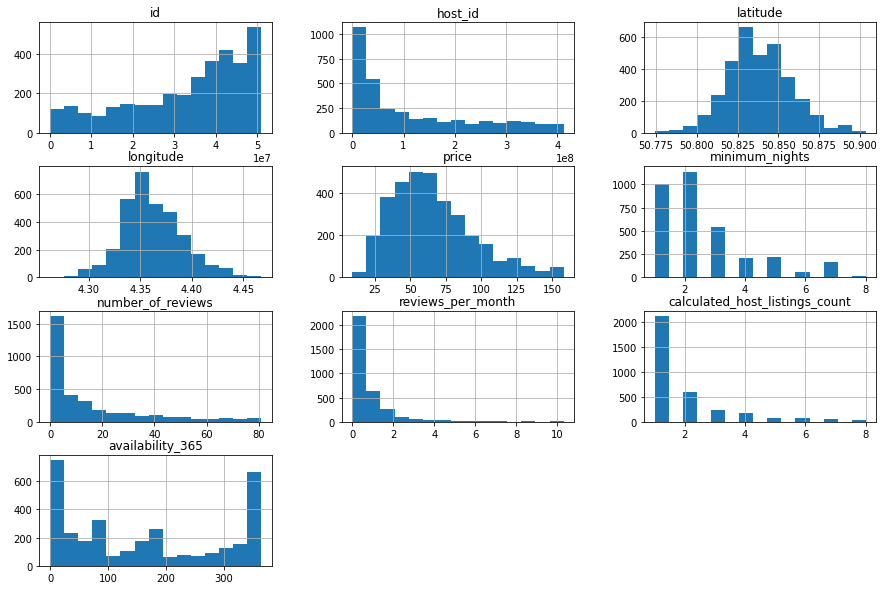

In [30]:
df_clean.hist(bins=15, figsize=(15,10));

In [31]:
df_clean.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.348000e+03,3.348000e+03,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000
mean,3.320195e+07,1.166670e+08,50.838159,4.361977,64.606631,2.523297,14.607228,0.717948,1.820789,165.244922
std,1.431703e+07,1.202636e+08,0.019915,0.029189,28.790388,1.636635,19.174139,1.026646,1.463476,135.795567
min,2.352000e+03,2.582000e+03,50.774130,4.262380,9.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,2.329685e+07,2.001185e+07,50.825210,4.343203,43.000000,1.000000,1.000000,0.070000,1.000000,34.000000
50%,3.733630e+07,6.006088e+07,50.836660,4.357920,60.000000,2.000000,6.000000,0.370000,1.000000,148.000000
75%,4.452334e+07,1.996470e+08,50.850678,4.380275,80.000000,3.000000,21.000000,0.980000,2.000000,316.000000
max,5.099653e+07,4.123949e+08,50.903680,4.467680,158.000000,8.000000,81.000000,10.310000,8.000000,365.000000


In [32]:
# identificando os outliers para a variável number_of_reviews
q1_number_of_reviews = df_clean.number_of_reviews.quantile(.25)
q3_number_of_reviews = df_clean.number_of_reviews.quantile(.75)
IQR_number_of_reviews = q3_number_of_reviews - q1_number_of_reviews
print('IQR da variável number_of_reviews: ', IQR_number_of_reviews)

# definindo os limites                                       
sup_number_of_reviews = q3_number_of_reviews + 1.5 * IQR_number_of_reviews
inf_number_of_reviews = q1_number_of_reviews - 1.5 * IQR_number_of_reviews

print('Limite superior de price: ', sup_number_of_reviews)
print('Limite inferior de price: ', inf_number_of_reviews)

IQR da variável number_of_reviews:  20.0
Limite superior de price:  51.0
Limite inferior de price:  -29.0


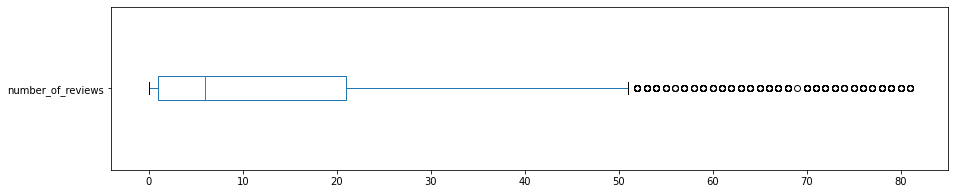

number_of_reviews: valores acima de 51.0000:
239 entradas
7.1386%


In [33]:
df_clean.number_of_reviews.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("number_of_reviews: valores acima de {:,.4f}:".format(sup_number_of_reviews))
print("{} entradas".format(len(df_clean[df_clean.number_of_reviews > sup_number_of_reviews])))
print("{:.4f}%".format((len(df_clean[df_clean.number_of_reviews > sup_number_of_reviews]) / df_clean.shape[0])*100))

### **Q4. Qual a média dos preços de aluguel?**

In [34]:
# ver a média da coluna `price` anterior
df.price.describe()

count    5718.000000
mean       83.652151
std       144.053468
min         0.000000
25%        43.000000
50%        60.000000
75%        89.000000
max      5000.000000
Name: price, dtype: float64

In [35]:
# ver a média da coluna `price` posterior ao tratamento dos outliers
df_clean.price.describe()

count    3348.000000
mean       64.606631
std        28.790388
min         9.000000
25%        43.000000
50%        60.000000
75%        80.000000
max       158.000000
Name: price, dtype: float64

> Ao compararmos o valor médio antes da exclusão **(83.65)** dos outliers e após a exclusão **(64.60)** percebemos naturalmente um redução no valor da média, mas observando o desvio padrão, podemos perceber que a variação dos dados está bem menor do que o anterior. 
Podemos observar o histograma para entender melhor.

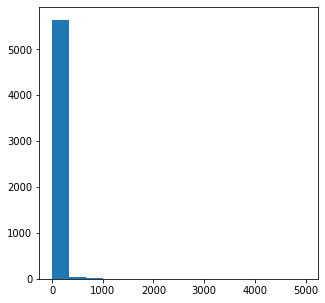

In [36]:
df.price.hist(bins=15,  figsize=(5,5), grid=False);

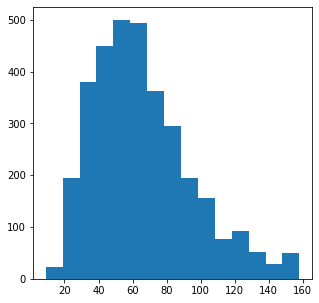

In [37]:
df_clean.price.hist(bins=15, figsize=(5,5), grid=False);

### **Q4. Qual a correlação existente entre as variáveis**

Em probabilidade e estatística, correlação, dependência ou associação é qualquer relação estatística (causal ou não causal) entre duas variáveis e correlação é qualquer relação dentro de uma ampla classe de relações estatísticas que envolva dependência entre duas variáveis. 
Por exemplo, a correlação entre a estatura dos pais e a estatura dos pais e dos filhos. Embora seja comumente denotada como a medida de relação entre duas variáveis aleatórias, **correlação não implica causalidade**. Em alguns casos, correlação não identifica dependência entre as variáveis. Em geral, há pares de variáveis que apresentam forte dependência estatística, mas que possuem correlação nula. Para este casos, são utilizadas outras medidas de dependência.

Informalmente correlação é sinônimo de dependência. Formalmente variáveis são dependentes se não satisfizerem a propriedade matemática da independência probabilística. Em termos técnicos, correlação refere–se a qualquer um dos vários tipos específicos de relação entre os valores médios. Existem diferentes coeficientes de correlação para medir o grau de correlação. Um dos coeficientes de correlação mais conhecidos é o coeficiente de correlação de Pearson, obtido pela divisão da covariância de duas variáveis pelo produto dos seus desvios padrão e sensível a uma relação linear entre duas variáveis. Entretanto, há outros coeficientes de correlação mais robustos que o coeficiente de correlação de Pearson. Isto é, mais sensíveis às relações não lineares.

*Fonte:* [Wikipedia](https://pt.wikipedia.org/wiki/Correla%C3%A7%C3%A3o)

In [38]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3348 entries, 0 to 5714
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3348 non-null   int64  
 1   name                            3348 non-null   object 
 2   host_id                         3348 non-null   int64  
 3   host_name                       3348 non-null   object 
 4   neighbourhood                   3348 non-null   object 
 5   latitude                        3348 non-null   float64
 6   longitude                       3348 non-null   float64
 7   room_type                       3348 non-null   object 
 8   price                           3348 non-null   int64  
 9   minimum_nights                  3348 non-null   int64  
 10  number_of_reviews               3348 non-null   int64  
 11  last_review                     3348 non-null   object 
 12  reviews_per_month               33

Para analisar a correlação, escolhemos somente as variáveis que de alguma maneira poderão contribuir para o modelo de ML. Dessa forma, variáveis com valores únicos, nomes e datas, não foram consideradas. As variáveis neighbourhood e room_type, por serem de grande relevancia, foram transformadas para números ordinais.

#### **Aplicando OrdinalEncoder**

In [39]:
enc = OrdinalEncoder()
df_clean[["cat_neighbourhood","cat_room_type"]] = enc.fit_transform(df_clean[["neighbourhood","room_type"]])

In [40]:
# criar uma matriz de correlação

corr = df_clean[['price','cat_neighbourhood','latitude','longitude','cat_room_type', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)
# mostrar a matriz de correlação


,price,cat_neighbourhood,latitude,longitude,cat_room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.088803,0.006506,-0.019479,-0.418940,-0.011425,-0.036537,-0.063330,0.002652,0.093222
cat_neighbourhood,-0.088803,1.000000,-0.161977,0.277439,0.024871,0.046990,-0.028956,-0.062534,-0.074960,-0.005859
latitude,0.006506,-0.161977,1.000000,-0.013250,0.008935,-0.072541,0.016943,0.061017,0.053832,0.063395
longitude,-0.019479,0.277439,-0.013250,1.000000,0.008766,0.057440,-0.017248,-0.011724,-0.037052,-0.010419
cat_room_type,-0.418940,0.024871,0.008935,0.008766,1.000000,-0.203692,-0.017884,-0.095680,0.171495,0.097769
minimum_nights,-0.011425,0.046990,-0.072541,0.057440,-0.203692,1.000000,-0.083230,-0.173246,-0.104785,-0.088972
number_of_reviews,-0.036537,-0.028956,0.016943,-0.017248,-0.017884,-0.083230,1.000000,0.438816,0.086088,0.004343
reviews_per_month,-0.063330,-0.062534,0.061017,-0.011724,-0.095680,-0.173246,0.438816,1.000000,0.124082,-0.033894
calculated_host_listings_count,0.002652,-0.074960,0.053832,-0.037052,0.171495,-0.104785,0.086088,0.124082,1.000000,0.109161
availability_365,0.093222,-0.005859,0.063395,-0.010419,0.097769,-0.088972,0.004343,-0.033894,0.109161,1.000000


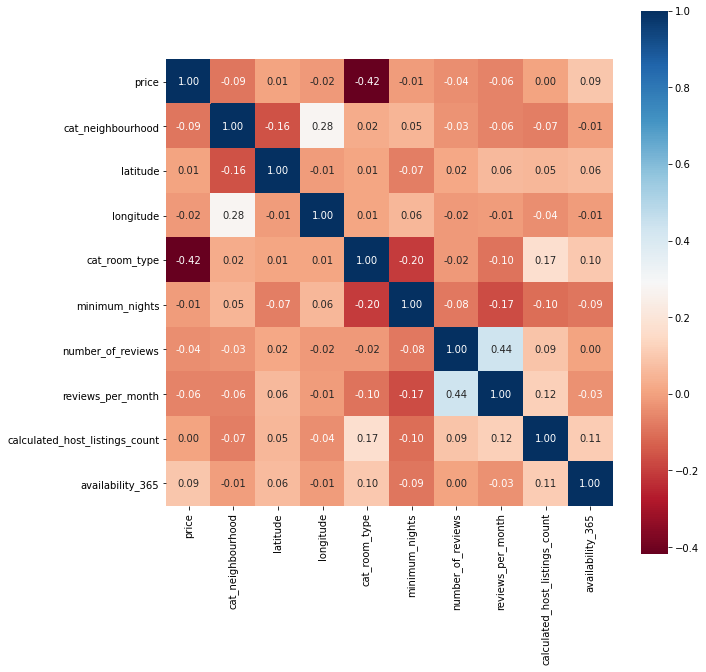

In [41]:
# plotar um heatmap a partir das correlações

fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True, ax=ax);


Ao analisar essas correlações percebi um possível erro ao colocar os dados da variável "room_type" como ordinais, pois ocorreu um peso negativo e sem uma lógica aparente em relação ao Preço. Irei transformar essas duas variaveis como binárias (dummies) e executar a correlação novamente.

Como as correlações da latitude e longitude não apresentaram uma boa performance, resolvi tentar gerar uma variável unica a partir das duas. Vou multiplicar uma pela outra para tentar obter um melhor resultado.


In [42]:
df_clean.drop(['cat_neighbourhood','cat_room_type'],axis=1,inplace=True)

nominal = ['neighbourhood','room_type']

dum = dummie(nominal,df_clean)

In [43]:
dum.head()

,neighbourhood_Anderlecht,neighbourhood_Auderghem,neighbourhood_Berchem-Sainte-Agathe,neighbourhood_Bruxelles,neighbourhood_Etterbeek,neighbourhood_Evere,neighbourhood_Forest,neighbourhood_Ganshoren,neighbourhood_Ixelles,neighbourhood_Jette,neighbourhood_Koekelberg,neighbourhood_Molenbeek-Saint-Jean,neighbourhood_Saint-Gilles,neighbourhood_Saint-Josse-ten-Noode,neighbourhood_Schaerbeek,neighbourhood_Uccle,neighbourhood_Watermael-Boitsfort,neighbourhood_Woluwe-Saint-Lambert,neighbourhood_Woluwe-Saint-Pierre,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [44]:
# Separa somente as colunas do dataframe original que serão necessárias para o novo Dataframe
columns = set(list(df_clean.columns)) - set(nominal)

In [45]:
dfCorr = pd.concat([df_clean[columns],dum], axis=1)

In [46]:
dfCorr['latitude_longitude'] = dfCorr.latitude * dfCorr.longitude

In [47]:
dfCorr.drop(['latitude','longitude'], axis=1, inplace=True)

In [48]:
column_cor = ['price','latitude_longitude','minimum_nights', 'number_of_reviews', 'reviews_per_month',
            'calculated_host_listings_count', 'availability_365'] + list(dum.columns)

corr = dfCorr[column_cor].corr()

display(corr)
# mostrar a matriz de correlação

,price,latitude_longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_Anderlecht,neighbourhood_Auderghem,neighbourhood_Berchem-Sainte-Agathe,neighbourhood_Bruxelles,neighbourhood_Etterbeek,neighbourhood_Evere,neighbourhood_Forest,neighbourhood_Ganshoren,neighbourhood_Ixelles,neighbourhood_Jette,neighbourhood_Koekelberg,neighbourhood_Molenbeek-Saint-Jean,neighbourhood_Saint-Gilles,neighbourhood_Saint-Josse-ten-Noode,neighbourhood_Schaerbeek,neighbourhood_Uccle,neighbourhood_Watermael-Boitsfort,neighbourhood_Woluwe-Saint-Lambert,neighbourhood_Woluwe-Saint-Pierre,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
price,1.000000,-0.019098,-0.011425,-0.036537,-0.063330,0.002652,0.093222,-0.000494,0.004445,-0.026664,0.118067,-0.013835,-0.020490,-0.025903,-0.004217,0.003833,0.008051,0.021151,-0.022036,-0.043961,-0.027892,-0.042869,-0.006757,-0.001976,-0.033915,-0.007425,0.399374,0.137141,-0.418343,-0.082262
latitude_longitude,-0.019098,1.000000,0.053158,-0.016233,-0.008143,-0.033871,-0.006719,-0.343820,0.247132,-0.156302,-0.065392,0.236535,0.167152,-0.244419,-0.113371,0.110271,-0.138286,-0.115649,-0.226313,-0.206554,0.059375,0.243307,-0.150028,0.171127,0.384806,0.319202,-0.007372,-0.032458,0.017577,-0.015970
minimum_nights,-0.011425,0.053158,1.000000,-0.083230,-0.173246,-0.104785,-0.088972,-0.054565,-0.001168,-0.018519,-0.072319,0.050880,0.018573,0.027043,-0.016870,0.052211,-0.028405,-0.030571,-0.027292,0.065407,-0.011789,-0.003139,-0.006700,0.006371,0.024143,-0.025154,0.209524,-0.084663,-0.184255,-0.049411
number_of_reviews,-0.036537,-0.016233,-0.083230,1.000000,0.438816,0.086088,0.004343,0.005998,0.006911,-0.006164,0.054069,-0.030808,0.001719,-0.020687,0.007148,-0.016477,-0.016963,0.005960,-0.026808,0.015666,0.015447,-0.012607,-0.007660,0.009068,-0.015174,-0.013321,0.015998,-0.022789,-0.002222,-0.047048
reviews_per_month,-0.063330,-0.008143,-0.173246,0.438816,1.000000,0.124082,-0.033894,-0.015807,-0.029090,-0.007811,0.130521,-0.033532,-0.008640,-0.037631,-0.008758,-0.018114,-0.001184,0.007429,-0.038214,-0.008091,0.004523,-0.016072,-0.032540,-0.012953,-0.013998,0.003120,0.098469,-0.042506,-0.085510,-0.025793
calculated_host_listings_count,0.002652,-0.033871,-0.104785,0.086088,0.124082,1.000000,0.109161,0.000520,-0.039108,-0.021701,0.125565,-0.001167,-0.047582,-0.054372,-0.026073,-0.029101,-0.033953,0.004262,-0.019210,0.082176,0.001787,-0.004452,-0.078792,-0.019922,-0.043547,-0.040686,-0.195086,0.202769,0.154741,-0.006684
availability_365,0.093222,-0.006719,-0.088972,0.004343,-0.033894,0.109161,1.000000,0.042517,-0.025116,0.034824,0.006239,0.005177,0.019021,-0.054653,0.010758,-0.021123,0.028547,0.032554,0.032503,-0.052895,0.016081,0.004289,0.001861,-0.005366,0.016096,0.022056,-0.106334,0.101277,0.079606,0.031527
neighbourhood_Anderlecht,-0.000494,-0.343820,-0.054565,0.005998,-0.015807,0.000520,0.042517,1.000000,-0.028303,-0.015811,-0.121889,-0.050809,-0.022734,-0.051112,-0.016247,-0.096590,-0.027793,-0.021783,-0.041465,-0.075458,-0.033648,-0.062792,-0.055916,-0.024818,-0.038697,-0.028303,-0.037422,0.033935,0.031242,-0.003794
neighbourhood_Auderghem,0.004445,0.247132,-0.001168,0.006911,-0.029090,-0.039108,-0.025116,-0.028303,1.000000,-0.009676,-0.074590,-0.031093,-0.013912,-0.031278,-0.009942,-0.059109,-0.017008,-0.013330,-0.025374,-0.046177,-0.020591,-0.038426,-0.034218,-0.015187,-0.023681,-0.017320,-0.006478,-0.013721,0.011857,-0.012086
neighbourhood_Berchem-Sainte-Agathe,-0.026664,-0.156302,-0.018519,-0.006164,-0.007811,-0.021701,0.034824,-0.015811,-0.009676,1.000000,-0.041670,-0.017370,-0.007772,-0.017473,-0.005554,-0.033021,-0.009502,-0.007447,-0.014175,-0.025797,-0.011503,-0.021467,-0.019116,-0.008484,-0.013229,-0.009676,-0.038057,-0.007665,0.041489,-0.006752


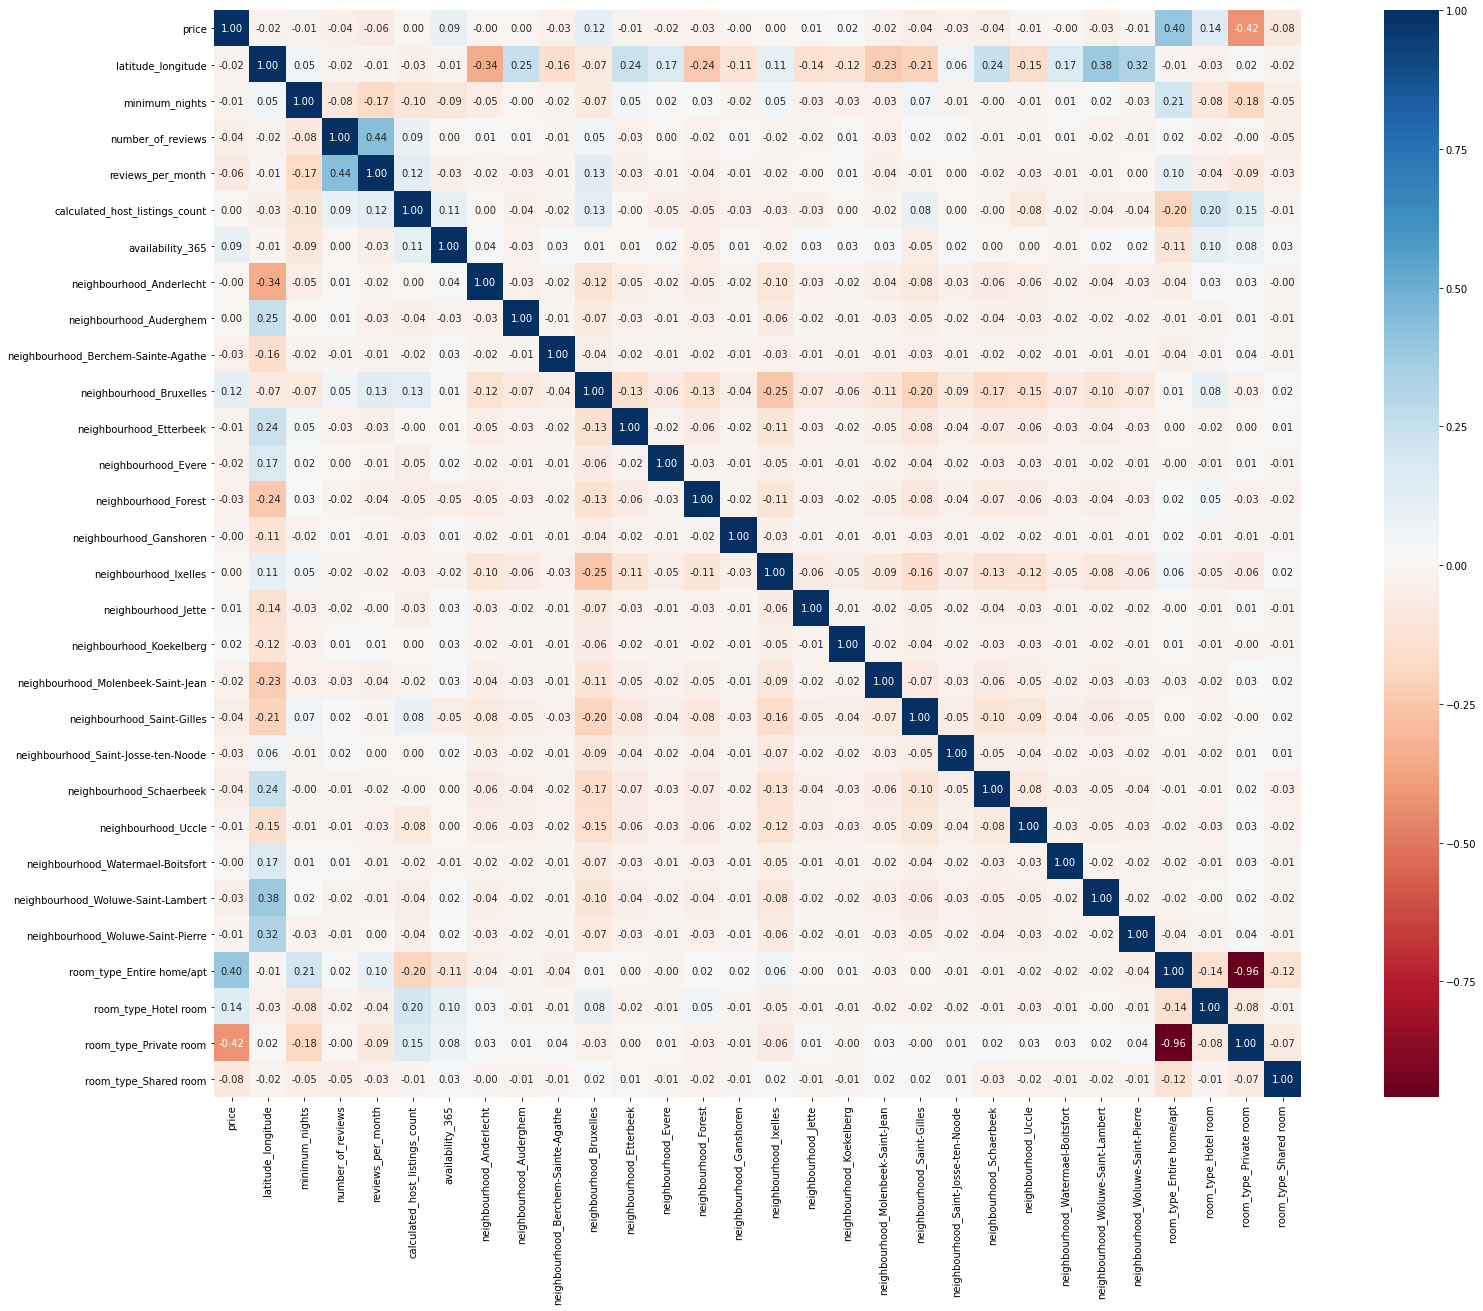

In [49]:
# plotar um heatmap a partir das correlações

fig, ax = plt.subplots(figsize=(30,20))         # Sample figsize in inches
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True, ax=ax);

**Multicolinearidade** consiste em um problema comum em regressões, no qual as variáveis independentes possuem relações lineares exatas ou aproximadamente exatas. O índício mais claro da existência da multicolinearidade é quando o R² é bastante alto, mas nenhum dos coeficientes da regressão é estatisticamente significativo segundo a estatística t convencional. As consequências da multicolinearidade em uma regressão são a de erros-padrão elevados no caso de multicolinearidade moderada ou severa e até mesmo a impossibilidade de qualquer estimação se a multicolinearidade for perfeita.

Fonte: [Wikipedia](https://pt.wikipedia.org/wiki/Multicolinearidade)

Neste Caso, encontramos algumas ***possíveis*** multicolinearidades como:
* room_type_Priveite_room com room_type_entire home/apt;
* Reviews_per_month com number_of_revies;

É necessário tratar as multicolinearidades para evitar problemas de overfiting nos modelos de machine learning.

### **Q5. Qual o tipo de imóvel que mais encontra-se disponível no Airbnb?**

Se observarmos o campo room_type x a quantidade de anuncios disponíveis, percebemos que imóveis inteiros e quartos privados são os que tem maior disponibilidade.

In [54]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.groupby(['room_type'])['id'].count().sort_values(ascending=False)

room_type
Entire home/apt    2135
Private room       1149
Hotel room           36
Shared room          28
Name: id, dtype: int64

In [58]:
# mostrar a porcentagem de cada tipo de imóvel disponível

(df_clean.groupby(['room_type'])['id'].count()/df_clean.room_type.count()).sort_values(ascending=False)

room_type
Entire home/apt    0.637694
Private room       0.343190
Hotel room         0.010753
Shared room        0.008363
Name: id, dtype: float64

In [65]:
# mostrar a quantidade de cada tipo de imóvel disponível
result_df = pd.concat([df_clean.groupby(['room_type'])['id'].count().sort_values(ascending=False), (df_clean.groupby(['room_type'])['id'].count()/df_clean.room_type.count()).sort_values(ascending=False)],axis=1 )

In [68]:
result_df.columns = ['Quantidade','Percentual']

In [69]:
result_df

,Quantidade,Percentual
room_type,,
Entire home/apt,2135,0.637694
Private room,1149,0.343190
Hotel room,36,0.010753
Shared room,28,0.008363


Se considerarmos que os imóveis que possuem menor disponibilidade são mais locados, e que 50% dos imóveis possuem menos de 148 diárias disponíveis para locação nos próximos 365 dias, podemos inferir que os imóveis inteiros são mais locados que os outros tipos.

In [71]:
df_clean[['availability_365']].describe()

,availability_365
count,3348.000000
mean,165.244922
std,135.795567
min,0.000000
25%,34.000000
50%,148.000000
75%,316.000000
max,365.000000


In [93]:
condition = df_clean.availability_365 < df_clean['availability_365'].quantile(.50)
results_2 = df_clean[condition]
results_2.groupby(['room_type'])['id'].count().sort_values(ascending=False)

room_type
Entire home/apt    1133
Private room        521
Shared room          12
Hotel room            2
Name: id, dtype: int64

In [92]:
(results_2.groupby(['room_type'])['id'].count()/results_2.room_type.count()).sort_values(ascending=False)

room_type
Entire home/apt    0.679257
Private room       0.312350
Shared room        0.007194
Hotel room         0.001199
Name: id, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [105]:
# ver preços por bairros, na média
df_clean.groupby('neighbourhood').agg(price=('price','mean'), qtd=('id','count')).sort_values(by=['price'], ascending=False)

,price,qtd
neighbourhood,,
Koekelberg,70.617647,34
Bruxelles,70.603194,814
Jette,66.400000,55
Auderghem,65.578947,57
Ixelles,64.852313,562
Anderlecht,64.540541,148
Watermael-Boitsfort,64.113636,44
Uccle,63.858491,212
Ganshoren,63.000000,19


Observando a média por bairro, identificamos uma variação relativamente baixa do preço médio. Mas o bairro mais caro é o bairro Koekelberg. Temos que considerar que pela diferença de preço em relação ao Bairro Bruxelles e considerando a quantidade amostral, pode ser que o preço médio do bairro Koekelberg esteja com um viés, o que precisamos analisar um pouco mais para entender o comportamento desses dados.

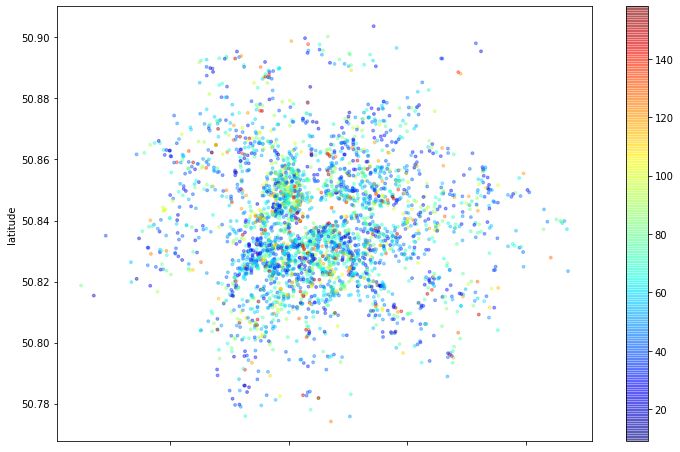

In [103]:
# plotar os imóveis pela latitude-longitude

df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [104]:
# ver a média da coluna `minimum_nights``
df_clean[['minimum_nights']].describe()

,minimum_nights
count,3348.000000
mean,2.523297
std,1.636635
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,8.000000


Na média, o mínimo de noites disponível para locação é 2.52 dias por locação.

## Conclusões


Nesta análise, percebemos que os dados indisponíveis puderam ser substituidos de maneira a não ocorrer perdas. Alguns registros apresentaram outliers onde houve a necessidade de adequar o universo dos dados, onde houve uma perda de 41% dos dados.

Analisando a correlação dos dados, percebemos uma possível presença de multicolinearidade, o que pode originar problemas em um treinamento de modelos de machine learning.

No universo de bairros tratado, existem dados suficientes para análise e percebe-se um preço médio de diária com uma certa uniformidade. 